<a href="https://colab.research.google.com/github/a-apte/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [1]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

# STANDARD NORMAL DISTRIBUTION, N ~ (0,1)

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter, df = 5
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [4]:
t2 = stats.t(30)  # Will be closer to normal, df = 30
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [7]:
# TODO - during class, but please help!

import numpy as np

survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
 1, 0, 1, 0, 1, 1, 0, 0, 0]

mean = np.mean(survey_data) #.sum() / len(survey_data)

print(mean)

0.66


In [35]:
import pandas as pd

df = pd.DataFrame(survey_data)

df.describe()

,0
count,50.000000
mean,0.660000
std,0.478518
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


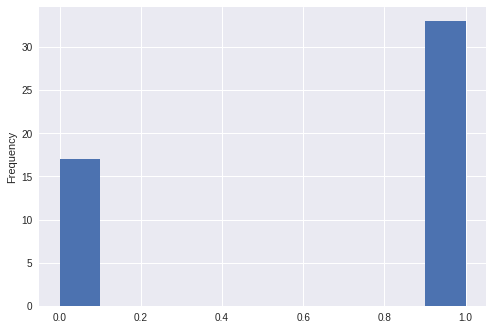

In [11]:
df.plot.hist()

In [14]:
import scipy
scipy.stats.ttest_1samp(survey_data, 0.5)

# the t-statistic is the ratio of the departure of the estimated value of  a parameter from its hypothesized value to its standard error

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [18]:
def t_test(col, u = 0):
  n = len(col)
  sd = col.std()
  mean = col.mean()
  t_stat = (mean - u) / (sd / np.sqrt(n))
  return t_stat
  
print(t_test(df,0.5))

2.3643218531561954


In [33]:
import random

def make_soda_data(n=50):
  return pd.DataFrame([random.randint(0,1) for _ in range(n)])

# make_soda_data(50)

t_stats = []
p_values = []
n_experiments = 10000

for _ in range(n_experiments):
  df = make_soda_data()
  t_test = scipy.stats.ttest_1samp(df, 0.5)
  t_stats.append(t_test.statistic)
  p_values.append(t_test.pvalue)

pd.DataFrame(t_stats).describe()
# pd.DataFrame(p_values).describe()

,0
count,10000.000000
mean,0.003971
std,1.024142
min,-4.261465
25%,-0.561801
50%,0.000000
75%,0.561801
max,4.731485


In [20]:
print (df.var())
print (df.std())

0.22897959183673472
0.4785181206984065


**STRETCH GOAL - Functions to calculate these outside of Stats**

In [0]:
def standard_error_pooled (col1,col2):
  len1 = len(col1)
  len2 = len(col2)
  var1 = col1.var()
  var2 = col2.var()
  se = np.sqrt((var1/len1) + (var2/len2))
  return se

# Source: https://stattrek.com/hypothesis-test/difference-in-means.aspx

In [0]:
def degrees_freedom_pooled (col1, col2):
  len1 = len(col1)
  len2 = len(col2)
  var1 = col1.var()
  var2 = col2.var()
  df1 = var1 / len1
  df2 = var2 / len2
  df = ((df1 + df2)**2) / ((df1**2/(len1 - 1)) + (df2**2/(len2 - 1)))
  
  return int(df)
  
  
# Source: https://stattrek.com/hypothesis-test/difference-in-means.aspx

In [0]:
def t_test_2mean(col1, col2, d=0):
  mean1 = col1.mean()
  mean2 = col2.mean()
  t_stat = ((mean1 - mean2) - d) / standard_error_pooled(col1,col2)
  return t_stat
  

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

**NULL HYPOTHESIS** : The difference between the voting percentages between Democrats and Republicans is _due to chance_.

**ALTERNATE HYPOTHESIS**: The difference between the voting percentages between Democrats and Republicans is not due to chance.

In [0]:
import pandas as pd

from scipy import stats

import numpy as np

In [43]:
'''   Attribute Information:
   1. Class Name: 2 (democrat, republican)
   2. handicapped-infants: 2 (y,n)
   3. water-project-cost-sharing: 2 (y,n)
   4. adoption-of-the-budget-resolution: 2 (y,n)
   5. physician-fee-freeze: 2 (y,n)
   6. el-salvador-aid: 2 (y,n)
   7. religious-groups-in-schools: 2 (y,n)
   8. anti-satellite-test-ban: 2 (y,n)
   9. aid-to-nicaraguan-contras: 2 (y,n)
  10. mx-missile: 2 (y,n)
  11. immigration: 2 (y,n)
  12. synfuels-corporation-cutback: 2 (y,n)
  13. education-spending: 2 (y,n)
  14. superfund-right-to-sue: 2 (y,n)
  15. crime: 2 (y,n)
  16. duty-free-exports: 2 (y,n)
  17. export-administration-act-south-africa: 2 (y,n)
'''




url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

headers = ['party', 'hand_infants', 'water_project', 'budget_adoption',
           'freeze_physicians', 'el_salvador', 'religion_school', 'satellite_ban',
           'contras_aid', 'mx_missile', 'immigration', 'synfuels_cutback',
           'education','superfund','crime','duty_free', 'south_africa']

df = pd.read_csv(url, names = headers) # Use "names", not "headers"

df.head()

,party,hand_infants,water_project,budget_adoption,freeze_physicians,el_salvador,religion_school,satellite_ban,contras_aid,mx_missile,immigration,synfuels_cutback,education,superfund,crime,duty_free,south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [44]:
df.isnull().sum()

party                0
hand_infants         0
water_project        0
budget_adoption      0
freeze_physicians    0
el_salvador          0
religion_school      0
satellite_ban        0
contras_aid          0
mx_missile           0
immigration          0
synfuels_cutback     0
education            0
superfund            0
crime                0
duty_free            0
south_africa         0
dtype: int64

In [45]:
'''   Attribute:  #Missing Values:
           1:  0
           2:  0
           3:  12
           4:  48
           5:  11
           6:  11
           7:  15
           8:  11
           9:  14
          10:  15
          11:  22
          12:  7
          13:  21
          14:  31
          15:  25
          16:  17
          17:  28
           '''

df.replace('?', np.nan, inplace = True) # Null values come from replacing ?
df.replace('n', 0, inplace = True)
df.replace('y', 1, inplace = True)

df.isnull().sum()

party                  0
hand_infants          12
water_project         48
budget_adoption       11
freeze_physicians     11
el_salvador           15
religion_school       11
satellite_ban         14
contras_aid           15
mx_missile            22
immigration            7
synfuels_cutback      21
education             31
superfund             25
crime                 17
duty_free             28
south_africa         104
dtype: int64

In [46]:
df.head()

,party,hand_infants,water_project,budget_adoption,freeze_physicians,el_salvador,religion_school,satellite_ban,contras_aid,mx_missile,immigration,synfuels_cutback,education,superfund,crime,duty_free,south_africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [47]:
dem_df = df.loc[df['party'] == 'democrat']
rep_df = df.loc[df['party'] == 'republican']

print(len(dem_df))
print(len(rep_df))
print(len(dem_df)+len(rep_df))
print(len(df))

267
168
435
435


In [101]:
dem_df.isnull().sum()

party                 0
hand_infants          9
water_project        28
budget_adoption       7
freeze_physicians     8
el_salvador          12
religion_school       9
satellite_ban         8
contras_aid           4
mx_missile           19
immigration           4
synfuels_cutback     12
education            18
superfund            15
crime                10
duty_free            16
south_africa         82
dtype: int64

In [102]:
rep_df.isnull().sum()

party                 0
hand_infants          3
water_project        20
budget_adoption       4
freeze_physicians     3
el_salvador           3
religion_school       2
satellite_ban         6
contras_aid          11
mx_missile            3
immigration           3
synfuels_cutback      9
education            13
superfund            10
crime                 7
duty_free            12
south_africa         22
dtype: int64

In [51]:
# TEST

col = 'hand_infants'

print(stats.ttest_ind(dem_df[col], rep_df[col]).statistic)
print(stats.ttest_ind(dem_df[col], rep_df[col]).pvalue)

nan
nan


**SCIPY Stats has issues with null values, the following are calculated using functions I made that bypass the Nulls**

In [52]:
print(t_test_2mean(dem_df[col], rep_df[col])) # No issues with nulls here

9.7893533959554


In [88]:
header_new = ['hand_infants', 'water_project', 'budget_adoption',
           'freeze_physicians', 'el_salvador', 'religion_school', 'satellite_ban',
           'contras_aid', 'mx_missile', 'immigration', 'synfuels_cutback',
           'education','superfund','crime','duty_free', 'south_africa']

print("    Issue                 T-Stat                            p-value")

for col in header_new:
  deg = degrees_freedom_pooled(dem_df[col], rep_df[col])
  tt = t_test_2mean(dem_df[col], rep_df[col])
  pval = 2*(1-stats.t.cdf(np.abs(tt), deg))
  print('{:<18}   {:>10}   {:>30}'.format(col,tt, pval))

    Issue                 T-Stat                            p-value
hand_infants         9.7893533959554                              0.0
water_project        -0.09446922985621549               0.9247898723223926
budget_adoption      23.079483674193753                              0.0
freeze_physicians    -57.47742211129807                              0.0
el_salvador          -24.360977229831718                              0.0
religion_school      -10.908427231203559                              0.0
satellite_ban        12.6820892564636                              0.0
contras_aid          18.685329068643604                              0.0
mx_missile           17.832031483344764                              0.0
immigration          -1.7522009422616271              0.08060020013130109
synfuels_cutback     9.268630930517325                              0.0
education            -21.529276094661263                              0.0
superfund            -14.786188218075184                

In [103]:
# Uploading data into Pandas

issues = []
for col in header_new:
  dem_mean = 100*dem_df[col].mean()
  rep_mean = 100*rep_df[col].mean()
  diff = dem_mean - rep_mean
  deg = degrees_freedom_pooled(dem_df[col], rep_df[col])
  tt = t_test_2mean(dem_df[col], rep_df[col])
  pval = 2*(1-stats.t.cdf(np.abs(tt), deg))
  issues.append({'0_Issue': col, '1_Dem_mean%': dem_mean, '2_Rep_mean%': rep_mean,
                 '3_Difference':diff,'4_T-Stat': tt, '4_P-Value': pval, '5_DF': deg}) # List of dictionaries
  
print("Issues that Democrats favor vs Republicans \n")

pd.DataFrame(issues)

Issues that Democrats favor vs Republicans 



,0_Issue,1_Dem_mean%,2_Rep_mean%,3_Difference,4_P-Value,4_T-Stat,5_DF
0,hand_infants,60.465116,18.787879,41.677237,0.000000e+00,9.789353,408
1,water_project,50.209205,50.675676,-0.466471,9.247899e-01,-0.094469,354
2,budget_adoption,88.846154,13.414634,75.431520,0.000000e+00,23.079484,333
3,freeze_physicians,5.405405,98.787879,-93.382473,0.000000e+00,-57.477422,410
4,el_salvador,21.568627,95.151515,-73.582888,0.000000e+00,-24.360977,420
5,religion_school,47.674419,89.759036,-42.084618,0.000000e+00,-10.908427,432
6,satellite_ban,77.220077,24.074074,53.146003,0.000000e+00,12.682089,349
7,contras_aid,82.889734,15.286624,67.603110,0.000000e+00,18.685329,366
8,mx_missile,75.806452,11.515152,64.291300,0.000000e+00,17.832031,420
9,immigration,47.148289,55.757576,-8.609287,8.060020e-02,-1.752201,356


### Issues that Democrats support more than Republicans with p < 0.01

**2. handicapped-infants: 2 (y,n)**

** 4. adoption-of-the-budget-resolution: 2 (y,n)**
   
**8. anti-satellite-test-ban: 2 (y,n)**
  
**9. aid-to-nicaraguan-contras: 2 (y,n)**
 
**10. mx-missile: 2 (y,n)**
 
**12. synfuels-corporation-cutback: 2 (y,n)**
 
**16. duty-free-exports: 2 (y,n)**
  
** 17. export-administration-act-south-africa: 2 (y,n) **

### Issues that Republicans support more than Democrats with p < 0.01

  
**5. physician-fee-freeze: 2 (y,n)**
 
**6. el-salvador-aid: 2 (y,n)**
 
**7. religious-groups-in-schools: 2 (y,n)**
 
**11. immigration: 2 (y,n)**
 
**13. education-spending: 2 (y,n)**
 
**14. superfund-right-to-sue: 2 (y,n)**
 
**15. crime: 2 (y,n)**
 


### Issues that neither party supports more than the other (p > 0.01) 

   
 **  3. water-project-cost-sharing: 2 (y,n)**
  
